# Epithelium Visualization

In [14]:
import tyssue

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
try:
    import seaborn as sns
except ImportError:
    pass
    
%matplotlib inline

import tyssue as ty

from tyssue.core.sheet import Sheet
from tyssue.core.generation import three_faces_sheet
from tyssue.geometry.sheet_geometry import SheetGeometry  as geom
from tyssue.draw.plt_draw import sheet_view
from tyssue.config import load_default

In [2]:
datasets, specs = three_faces_sheet()
sheet = Sheet('3cells_2D', datasets, specs)


geom.update_all(sheet)

/home/guillaume/anaconda3/envs/py35/lib/python3.5/site-packages/tyssue-0.1-py3.5.egg/tyssue/config/geometry/__init__.py:181: UserWarning: Deprecated, use spherical_sheet(), cylindrical_sheet() or flat_sheet() instead
  warnings.warn("Deprecated, use spherical_sheet(), "


In [3]:
sheet.vert_df.describe().head(3)

,rho,height,y,z,basal_shift,x
count,13.000000,13.000000,1.300000e+01,13.0,13.0,13.000000
mean,1.491694,-2.508306,-8.540177e-18,0.0,4.0,0.000000
std,0.582529,0.582529,1.172570e+00,0.0,0.0,1.172604


## Matplotlib based representation

### Custom settings

These might go in a config file latter on.

#### Ploting itself

## Epithelial sheet representation


### The  default

In [4]:
draw_specs = tyssue.config.draw.sheet_spec()

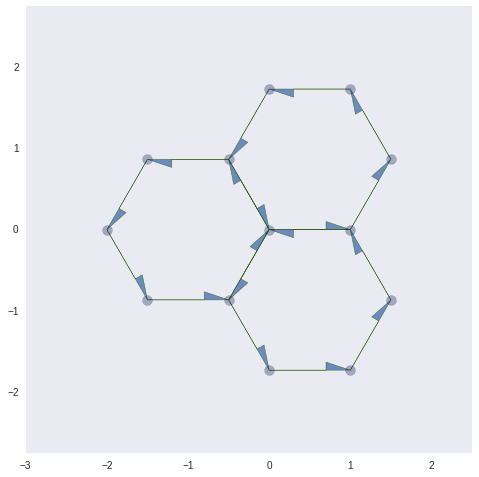

In [5]:
fig, ax = sheet_view(sheet, ['x', 'y'])


ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))
    


#### Coloring

In [6]:

## Let's add a column to sheet.vert_df
sheet.vert_df['rand'] = np.linspace(0.0, 1.0, 
                                  num=sheet.vert_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.vert_df.rand)

draw_specs['vert']['color'] = color_cmap
draw_specs['vert']['alpha'] = 0.5
draw_specs['vert']['s'] = 500

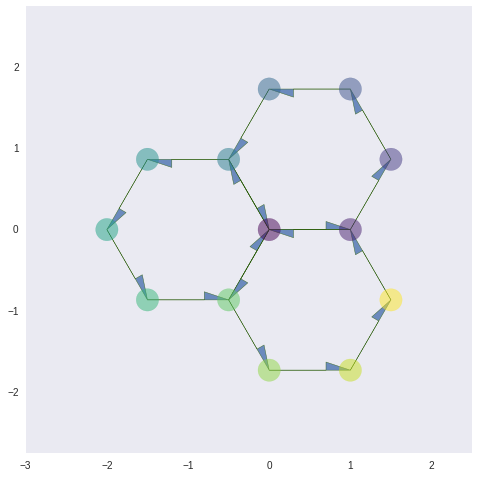

In [7]:
coords = ['x', 'y']
fig, ax = sheet_view(sheet, coords, **draw_specs)

ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))

#### Filling the cells



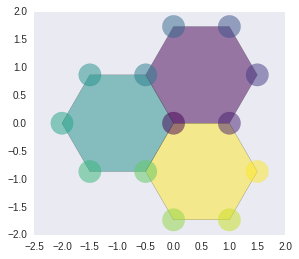

In [8]:
sheet.face_df['col'] = np.linspace(0.0, 1.0, 
                                    num=sheet.face_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.face_df.col)

draw_specs['edge']['visible'] = False

draw_specs['face']['visible'] = True
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5


fig, ax = sheet_view(sheet, coords, **draw_specs)

### Vispy based


In [9]:
from tyssue.draw.vispy_draw import vp_view

In [10]:
draw_specs['edge']['visible'] = True

draw_specs['face']['visible'] = False
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5

edge_color = np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
edge_cmap = cmap(edge_color)
draw_specs['edge']['color'] = edge_cmap #[0, 0, 0, 1]
#draw_specs['edge']['color'] = [0, 0, 0, 0.2]

draw_specs['edge']['width'] = 8. * np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])

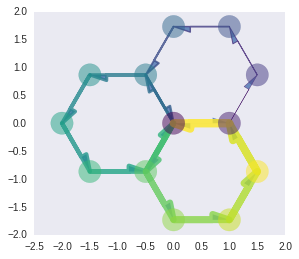

In [11]:
fig, ax = sheet_view(sheet, coords, **draw_specs)

In [13]:
draw_specs['face']['visible'] = True

draw_specs['edge']['width'] = 1.
canvas, view = vp_view(sheet, **draw_specs)

(<SceneCanvas (PyQt4) at 0x7f92192f3c50>, <ViewBox at 0x7f92180a9c18>)